<a href="https://colab.research.google.com/github/clarityEnjoyer/early-basic-ML/blob/main/img_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

(360, 360, 3)


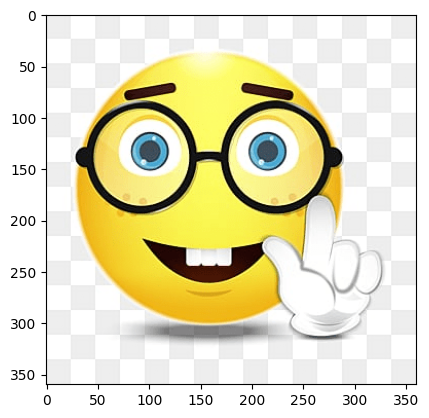

In [77]:
image = plt.imread("/content/sample.png")[:,:,:3] #ensuring that we dont have alpha
plt.imshow(image)
print (image.shape)

In [78]:
#3 first pixels
print(image[:3,0,:])

[[0.93333334 0.93333334 0.93333334]
 [0.93333334 0.93333334 0.93333334]
 [0.93333334 0.93333334 0.93333334]]


In [79]:
#need to reshape data to be 2d matrix
X_img = image.reshape(image.shape[0]*image.shape[1],image.shape[2])
# X_img=X_img/255
print(X_img[:3,:])

[[0.93333334 0.93333334 0.93333334]
 [0.93333334 0.93333334 0.93333334]
 [0.93333334 0.93333334 0.93333334]]




---
### TO DO:

* implement k-means
* add random centroid initializer
* construct a function running k-means *n* times and picking the best run


---


* implement compression



---



In [80]:
def initializer(X, K):
  return X[np.random.choice(X.shape[0], K, replace=False)]

checking the work of the initializer   

In [81]:
for i in range (3): print(initializer(X_img,4),'\n')

[[0.9764706  0.92941177 0.2784314 ]
 [0.92156863 0.92156863 0.92156863]
 [0.93333334 0.93333334 0.93333334]
 [0.98039216 0.96862745 0.31764707]] 

[[0.75686276 0.75686276 0.7529412 ]
 [0.2784314  0.6509804  0.8117647 ]
 [0.92941177 0.92941177 0.92941177]
 [1.         1.         1.        ]] 

[[1.         1.         0.99215686]
 [0.91764706 0.8745098  0.46666667]
 [0.93333334 0.93333334 0.93333334]
 [1.         1.         1.        ]] 



In [82]:
def kmeans(X, K, max_iters):
  centroids = initializer(X, K)
  m= X.shape[0]
  closest = np.zeros(m)
  for iter in range(max_iters):
    #for each point (pixel), find its closest centroid
    for i in range (m):
      dist = np.inf
      for k in range(K):
        d= np.sum((X[i]-centroids[k])**2)
        if (d<dist):
          dist = d
          closest[i] = k
    #now update centroids
    new_centroids=[]
    for k in range(K):
      assignedToMe = X[closest == k]
      cnt = assignedToMe.shape[0]
      if (cnt>0):
        sum= np.sum(assignedToMe, axis=0)
        centroids[k] = sum/cnt

  return centroids

**check if kmeans works**

In [83]:
# for i in range (3):
#   print(kmeans(X_img, 3, 10),'\n','-'*20)

In [84]:
def J (X, centroids):
  cost = 0
  m= X.shape[0]
  K= centroids.shape[0]
  for i in range (m):
    dist = np.inf
    for k in range(K):
      d= np.sum((X[i]-centroids[k])**2)
      if (d<dist):
        dist = d
    cost+=dist
  return cost/m

In [85]:
def kmeans_Ntimes(X, K, max_iters, N):
  best_cost=np.inf
  best_centroids=np.zeros((K,X.shape[1]))

  for _ in range (N):
    centroids = kmeans(X, K, max_iters)
    c=J(X, centroids)

    if (c<best_cost):
      best_cost=c
      best_centroids=centroids

  return best_centroids

In [86]:
# print("found centroids: \n",kmeans_Ntimes(X,3,7, 3))

# Task ( DONE WITH AI )
Optimize the provided K-Means clustering code for performance.

## Optimize the `kmeans` function

### Subtask:
Optimize the `kmeans` function by vectorizing distance calculations and centroid updates.


**Reasoning**:
The subtask is to optimize the `kmeans` function by vectorizing distance calculations and centroid updates. This requires modifying the existing `kmeans` function.



In [87]:
def kmeans2(X, K, max_iters):
  centroids = initializer(X, K)
  m = X.shape[0]

  for iter in range(max_iters):
    # Calculate squared Euclidean distance between each point and all centroids
    # Using broadcasting: (m, 3) - (K, 3) -> (m, K, 3) -> sum over axis=2 -> (m, K)
    distances = np.sum((X[:, np.newaxis, :] - centroids)**2, axis=2)

    # Find the index of the closest centroid for each point
    closest = np.argmin(distances, axis=1)

    # Update centroids
    for k in range(K):
      # Select data points assigned to centroid k
      assigned_points = X[closest == k]
      # Calculate the mean if there are points assigned to this centroid
      if assigned_points.shape[0] > 0:
        centroids[k]=np.mean(assigned_points, axis=0)
      # If no points are assigned, keep the old centroid (or re-initialize)
      # Keeping the old centroid is a common strategy

  return centroids

## Optimize the `j` function

### Subtask:
Optimize the `J` function for performance by vectorizing distance calculations.


**Reasoning**:
Rewrite the J function to calculate the cost using vectorized operations to improve performance.



In [88]:
def J2(X, centroids):
  m = X.shape[0]
  # Calculate squared Euclidean distance between each point and all centroids
  # Using broadcasting: (m, 3) - (K, 3) -> (m, K, 3) -> sum over axis=2 -> (m, K)
  distances = np.sum((X[:, np.newaxis, :] - centroids)**2, axis=2)

  # Find the minimum distance for each point (distance to its closest centroid)
  min_distances = np.min(distances, axis=1)

  # Calculate the mean of the squared minimum distances
  cost = np.mean(min_distances)

  return cost

In [89]:
def kmeans_Ntimes2(X, K, max_iters, N):
  best_cost=np.inf
  best_centroids=np.zeros((K,X.shape[1]))

  for _ in range (N):
    centroids = kmeans2(X, K, max_iters)
    c=J2(X, centroids)

    if (c<best_cost):
      best_cost=c
      best_centroids=centroids

  return best_centroids

## Test and compare

### Subtask:
Compare the performance of the original and optimized code.


**Reasoning**:
Import the time module to measure execution time and set the parameters for testing.



In [99]:
import time

# Set parameters for testing
K_test = 8
max_iters_test = 10
N_test = 5

**Reasoning**:
Measure and print the execution time of the original and optimized `kmeans_Ntimes` functions using the defined parameters.



In [100]:
def compare():
  # Measure execution time of the original kmeans_Ntimes (assuming it's still available in the environment)
  start_time_original = time.time()
  original_centroids = kmeans_Ntimes(X_img, K_test, max_iters_test, N_test)
  end_time_original = time.time()
  time_original = end_time_original - start_time_original

  # Measure execution time of the optimized kmeans_Ntimes
  start_time_optimized = time.time()
  optimized_centroids = kmeans_Ntimes2(X_img, K_test, max_iters_test, N_test)
  end_time_optimized = time.time()
  time_optimized = end_time_optimized - start_time_optimized

  # Print execution times
  print(f"Execution time (Original): {time_original:.4f} seconds")
  print(f"Execution time (Optimized): {time_optimized:.4f} seconds")

  # (Optional) Compare costs
  cost_original = J(X_img, original_centroids)
  cost_optimized = J(X_img, optimized_centroids)

  print(f"Final Cost (Original): {cost_original:.4f}")
  print(f"Final Cost (Optimized): {cost_optimized:.4f}")

In [101]:
compare()

Execution time (Original): 364.6529 seconds
Execution time (Optimized): 2.8083 seconds
Final Cost (Original): 0.0070
Final Cost (Optimized): 0.0064


# It is clear that vectorized form is ***a lot*** better
## therefore I will use it from now on

---
---
now it's time to do compression


In [93]:
#SET THE NUMBER OF COLOURS (clusters)
cluster_num = 8

In [94]:
centroids = kmeans_Ntimes2(X_img, cluster_num, 10, 10)
distances = np.sum((X_img[:,np.newaxis,:]-centroids)**2,axis=2)
closest = np.argmin(distances,axis=1)
X_img_compressed = centroids[closest]
image_compressed=X_img_compressed.reshape(image.shape)

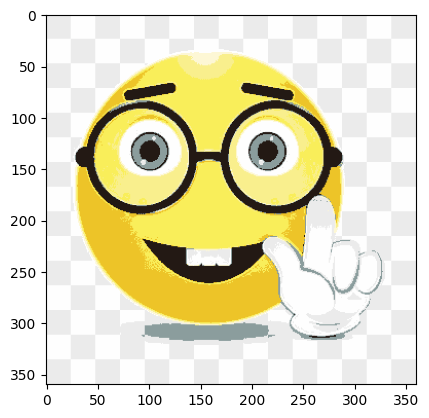

In [95]:
plt.imshow(image_compressed)

In [96]:
def plot_kMeans_RGB(X, centroids, closest, K):
    # Plot the colors and centroids in a 3D space
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(221, projection='3d')
    ax.scatter(*X.T*255, zdir='z', depthshade=False, s=.3, c=X)
    ax.set_xlabel('R value - Redness')
    ax.set_ylabel('G value - Greenness')
    ax.set_zlabel('B value - Blueness')
    # ax.w_yaxis.set_pane_color((0., 0., 0., .2)) # Removed this line
    ax.set_title("Original colors and their color clusters' centroids")
    ax.scatter(*centroids.T*255, zdir='z', depthshade=False, s=500, c='red', marker='x', lw=3, zorder=10) # Plot centroids after data points with higher zorder
    plt.show()


def show_centroid_colors(centroids):
    palette = np.expand_dims(centroids, axis=0)
    num = np.arange(0,len(centroids))
    plt.figure(figsize=(16, 16))
    plt.xticks(num)
    plt.yticks([])
    plt.imshow(palette)

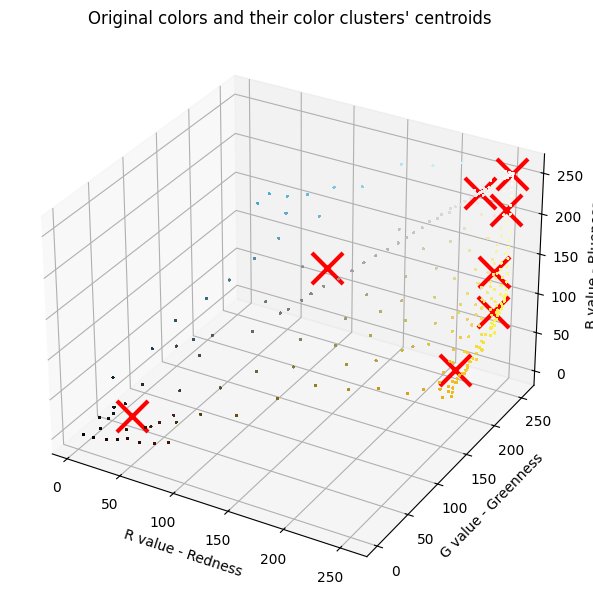

In [97]:
plot_kMeans_RGB(X_img, centroids, closest, cluster_num)